문제1] 한도시에서 기록된 일일 최고 기온은 연속형 확률변수 x를 따른다고 가정하자
x의 확률밀도는 아래와 같다

- 조건 1 : 주어진 확률밀도가 유효한지 확인하자
- 조건 2 : 기온이 정확히 15도일 확률은?
- 조건 3 : 기온이 10도 이하일 확률은 ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

#%precision 3
#%matplotlib inline

In [59]:
from scipy.integrate import quad
from scipy import integrate
import warnings

In [60]:
#확률밀도 함수 정의
def pdf(x):
    if 0< x <= 10:
        return 0.02 * x
    elif 10 < x <= 20:
        return 0.2 - 0.02 * x
    else:
        return 0

In [61]:
#1 주어진 확률밀도가 유효한지 확인하자
quad(pdf, 0, 20) #유효한 확률밀도함수임

(0.0, 2.220446049250313e-14)

In [62]:
#2 기온이 정확히 15도일 확률은?
quad(pdf, 15, 15)

(-0.0, 0.0)

In [63]:
#3 기온이 10도 이하일 확률은 ?
quad(pdf, 0, 10)

(1.0000000000000002, 1.1102230246251569e-14)

문제 2] 한도시에서 기록된 일일 평균 강수량은 연속형 확률변수 y를 따른다고 가정하자
y의 확률밀도는 아래와 같다

- 조건 1 : 주어진 확률밀도가 유효한지 확인하자
- 조건 2 : 정확히 8mm이 일 경우의 확률은?
- 조건 3 : 강수량이 5mm 이하일 확률은 ?

In [64]:
def pdf(y):
    if 0< y <= 5:
        return 0.02 * y
    elif 5 < y <= 10:
        return 0.2 - 0.02 * y
    elif 10 < y <= 15:
        return 0.35 - 0.02 * y
    else:        
        return 0

In [65]:
#1 주어진 확률밀도가 유효한지 확인하자
quad(pdf, 0, 15) #유효한 확률밀도함수임

(0.9999999999999999, 1.1102230246251563e-15)

In [66]:
#2 정확히 8mm이 일 경우의 확률은?
quad(pdf, 8, 8)

(0.0, 0.0)

In [67]:
#3 강수량이 5mm 이하일 확률은 ?
quad(pdf, 0, 5)

(0.25000000000000006, 2.775557561562892e-15)

In [68]:
#4 최소값 리턴 해보자. pdf
from scipy.optimize import minimize_scalar

res = minimize_scalar(pdf)
res.fun , res.x

(0, -1.6180339754913822)

In [72]:
#5 기대값, 분산, 시각화

#평균(기대값)
def integrand(x):
    return x * pdf(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

8.541666666412956

문제 3] 2022년 5월 날씨 데이터를 받아와서 바람속도컬럼을 추출한다.
조건 1. 연속형 확률 변수 z를 만든다  
조건 2. 확률 밀도 함수 검수한다  
조건 3. 바람의 속도가 50% ~ 70% 확률은 얼마인가  
조건 4. 바람의 속도가 30% ~ 40% 확률은 얼마인가  

문제 4]가우시안 커널 밀도 추정(Gaussian Kernel Density Estimation) 으로  날씨 데이터에 대한 확률 밀도 함수를 구해보자.  

*** 주어진 데이터 샘플을 기반으로 연속 확률밀도함수를 추정하는 비모수적(non-parametric) 방법으로 데이터 포인트들 주변에 가우시안(정규 분포) 커널을 배치하고, 이 커널들을 합하여 전체 데이터 분포의 부드러운 추정치를 생성한다.

*** 1) 커널 배치로 각 데이터 포인트에 대해 가우시안 커널(정규 분포 곡선)을 배치한다. 이 커널은 해당 포인트를 중심으로 하며, 특정 표준편차(밴드폭)를 가진다.

*** 2) 밀도 추정은 모든 커널을 합하여 연속적인 확률밀도함수로 형성하고 합산된 결과로 데이터의 전반적인 분포를 나타내는 부드러운 곡선을 만든다.

*** 3) 밴드폭 선택: 밴드폭은 커널의 폭을 결정하며, 이는 결과적인 밀도 추정의 부드러움에 큰 영향을 미친다.
- 조건 1 : 주어진 데이터 포인트를 기반으로 연속적인 확률 분포를 추정
- 조건 2: 특정 바람 속도 구간에 대한 확률을 계산

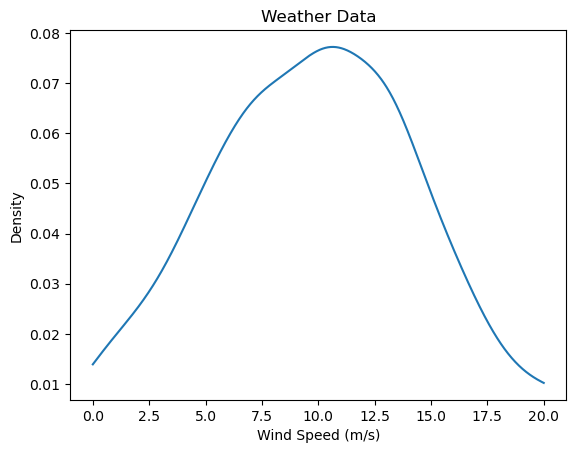

In [13]:
# 날씨 데이터에 대한 확률밀도함수를 구하는 예시 코드
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# (예: 평균 바람 속도)
weather_data = np.random.normal(loc=10, scale=5, size=1000)  # 평균 10m/s, 표준편차 5m/s, 1000개의 데이터

# 확률밀도함수 추정
kde = gaussian_kde(weather_data)

# 데이터에 대한 확률밀도함수 시각
x = np.linspace(0, 20, 1000)
plt.plot(x, kde(x))
plt.title("Weather Data")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Density")
plt.show()

문제 5] 한 연구에서 수집된 식물의 성장 높이 데이터가 있다.   
 단,이 데이터는 정규 분포를 따르지 않으며, 대신 다양한 값들로 구성되어 있다.  
 이 데이터셋에 대해 가우시안 커널 밀도 추정을 사용하여 다음과 같은 작업을 수행한다.  
- 조건 1. 임의로 생성된 식물 성장 높이 데이터를 사용하여 KDE를 수행한다.  
     - 이 데이터셋은 평균이 50cm, 표준편차가 10cm인 정규 분포와 / 평균이 70cm, 표준편차가 15cm인 정규 분포의 혼합으로 구성된다.
     - 각 분포에서 500개의 데이터 포인트를 생성한다.
- 조건 2. 밴드폭을 5cm로 설정하여 KDE를 수행하고, 결과를 시각화한다.
- 조건 3. 밴드폭이 결과에 미치는 영향을 관찰하기 위해, 밴드폭을 2cm와 10cm로 변경하여 다시 KDE를 수행하고 결과를 시각화한다.

In [16]:
#1 np.concatenate로 혼합
np.random.seed(0)
a= np.random.normal(loc=50, scale=10, size=500)
b= np.random.normal(loc=70, scale=15, size=500)
plant_heights = np.concatenate([a,b])


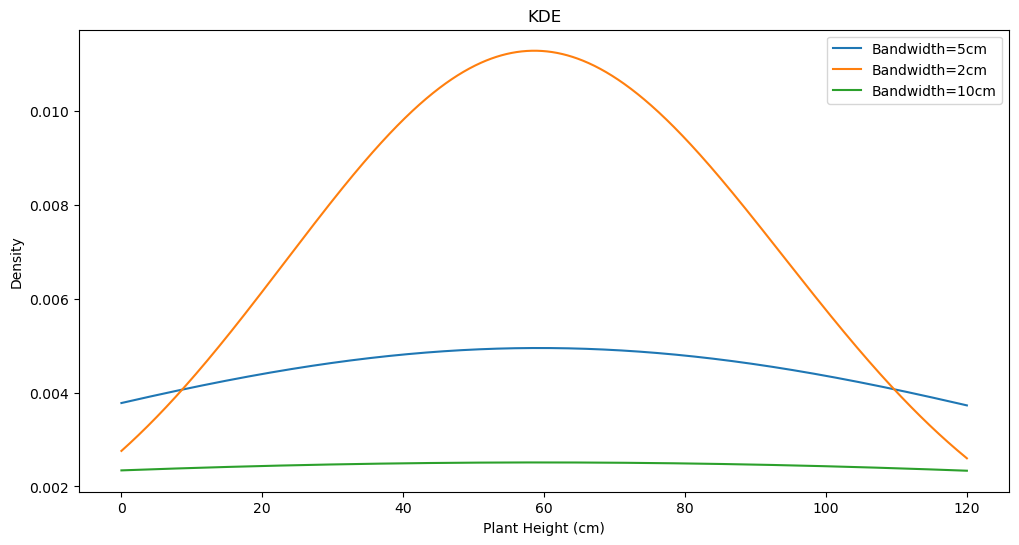

In [18]:
#2 밴드폭을 5cm로 설정하여 KDE를 수행하고, 결과를 시각화한다
kde = gaussian_kde(plant_heights, bw_method=5)
kde2 = gaussian_kde(plant_heights, bw_method=2)
kde10 = gaussian_kde(plant_heights, bw_method=10)

#3
x = np.linspace(0, 120, 1000)
plt.figure(figsize=(12,6))
plt.plot(x, kde(x) , label='Bandwidth=5cm')
plt.plot(x, kde2(x) , label='Bandwidth=2cm')
plt.plot(x, kde10(x) , label='Bandwidth=10cm')
plt.title("KDE")
plt.xlabel("Plant Height (cm)")
plt.ylabel("Density")
plt.legend()
plt.show()

- Bandwidth = 5cm (파란선) : 데이터 분포도가 가장 좋다
- Bandwidth = 2cm (오렌지선) : 데이터의 미세한 변화에 더 민감하게 반등하며 더 많은 변동성을 보여 준다 -> 과적합 발생
- Bandwidth = 10cm (초록선) : 데이터의 전반적인 추세가 강조 되었다 -> 과소적합 발생

문제 6] 시장조사에서 수집된 고객의 연간 지출 금액 데이터가 있다.
 - 정규분포를 따르지 않는다, 다양한 패턴을 가진다
 - 조건1 : KDE를 구현하자 , 데이터셋은 평균 1000 달러, 표준편차 200달러인 정규 분포와, 평균이 3000달러 , 표준편차가 500달러인 혼합
           = 300개 데이터 포인트 생성
 - 조건2 : 밴드폭을 100달러로 설정해서 KDE를 수행후 시각화 하자.
 - 조건3 : 밴드폭이 결과에 영향을 미치는 관찰을 위해서 밴드폭을 50달러와  200달러로 변경후 KDE 수행후 시각화
 - 조건4 : KDE 구한것을 보고 고객 지출패턴에 대한 생각을 해보자.

In [43]:
#1
np.random.seed(0)
ad= np.random.normal(loc=1000, scale=200, size=300)
bd= np.random.normal(loc=3000, scale=500, size=300)
annu_exp = np.concatenate([ad,bd])

In [51]:
#2
kde1 = gaussian_kde(plant_heights, bw_method=100)
kde2 = gaussian_kde(plant_heights, bw_method=50)
kde3 = gaussian_kde(plant_heights, bw_method=200)

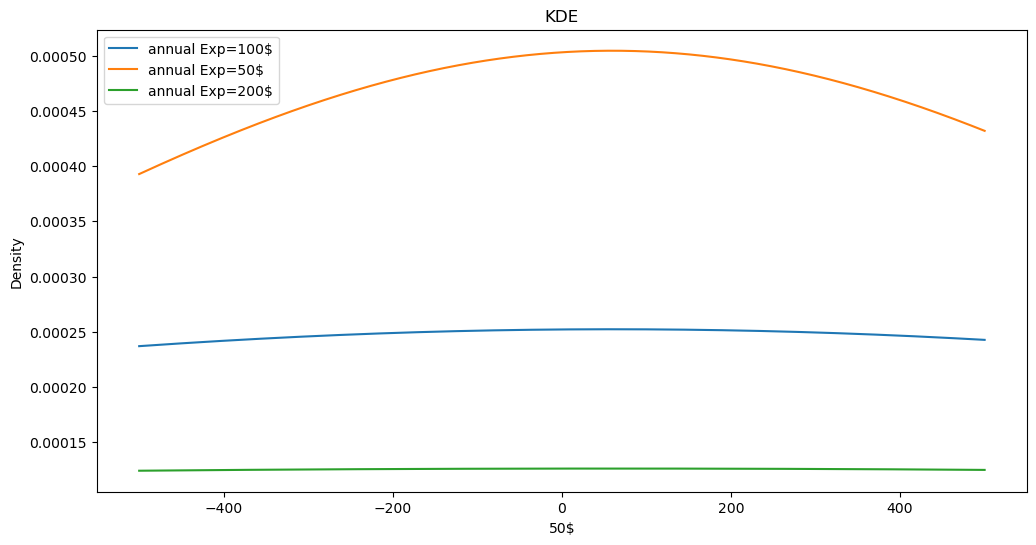

In [55]:
#3
x = np.linspace(-500, 500, 1000)
plt.figure(figsize=(12,6))

plt.plot(x, kde1(x) , label='annual Exp=100$')
plt.plot(x, kde2(x) , label='annual Exp=50$')
plt.plot(x, kde3(x) , label='annual Exp=200$')
plt.title("KDE")
plt.xlabel("50$")
plt.ylabel("Density")
plt.legend()
plt.show()

# 조건4 : KDE 구한것을 보고 고객 지출패턴에 대한 생각을 해보자.
# -> 구매행동, 마케팅 전략, 고객 세분화, 제품 및 서비스 개선 등
[질문] linspace 구간을 엄청 늘리면 봉우리가 나오긴 하는데 이것은 의미있는 분석이 될까요?  
답변] 데이터 존재하는 범위에서만 늘려라. 잘못늘리게 되면 실제 분석 자료 왜곡 = 과적합 , 불필요하게 구간을 넓히면 => 계산 효율성이 낮다

[질문] 그런데 데이터가 존재하는 범위에서 봤을때 저희처럼 평평하면 과소적합 발생한건가요??  
답변] 밴드폭이 조절 해본다 -> 조절 후도 같다면 과소적합이다.

[질문]kde의 bandwidth가 완만하게 하는 기준은 어떻게 되나요? 느낌상 무한대의 구간에서 적분값이 같은걸 기준으로 하는거 같은데 맞나요?  
[답변] 가우시안 커널은 무한대의 구간에서 적분값이 1이 되도록 정규화 되어있다. / 크로스 검증, AIC 검증, BIC 검증 -> 최적의 밴드폭을 결정
